In [1]:
%cd ..

/Users/marc/local-dev/3D-FaceReconstruction


In [17]:
from face_reconstruction.pipeline import Pipeline
from face_reconstruction.optim import NearestNeighborMode,DistanceType
import pyrender
import numpy as np
import matplotlib.pyplot as plt
from face_reconstruction.plots import plot_params,plot_reconstruction_error,PlotManager


In [3]:
frame_id = 4
pipeline = Pipeline(frame_id)

In [4]:
n_params_shape_sparse = 3 # 20
n_params_expression_sparse = 3 # 10
weight_shape_params_sparse = 100 # 10000
weight_expression_params_sparse = 100 # 1000
l2_regularization_sparse = 10000  # regularizes only face model parameters

In [5]:
params_sparse = pipeline.landmark_and_sparse_reconstruction(
                    n_params_shape_sparse=3,
                    n_params_expression_sparse = 3,
                    weight_shape_params_sparse=100,
                    weight_expression_params_sparse = 100,
                    l2_regularization_sparse = 10000,
                    initial_params = None)

###  Landmark detection ###
There are 3 pixels without depth information.
###  Sparse reconstruction ###
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.1400e+06                                    8.53e+06    
       1              2         3.5609e+06      3.58e+06       8.10e+01       1.84e+06    
       2              3         3.7221e+05      3.19e+06       2.04e+02       1.61e+05    
       3              4         3.0061e+05      7.16e+04       1.78e+02       8.63e+05    
       4              5         1.0339e+05      1.97e+05       6.73e+01       1.39e+05    
       5              6         6.3979e+04      3.94e+04       6.31e+01       5.39e+04    
       6              7         3.2573e+04      3.14e+04       9.98e+01       1.03e+05    
       7              8         2.0594e+04      1.20e+04       3.54e+01       1.59e+05    
       8              9         1.3009e+04      7.58e+03       8.78e+01     

In [6]:
params_dense = pipeline.dense_reconstruction(
                    params_sparse,
                    nn_mode = NearestNeighborMode.FACE_VERTICES, # FACE_VERTICES: every face vertex will be assigned its nearest neighbor in pointcloud
                                                                # POINTCLOUD: every point in pointcloud will be assigned its nearest neighbor in face model
                    distance_type = DistanceType.POINT_TO_POINT,
                    icp_iterations = 2,
                    optimization_steps_per_iteration = 20,
                    l2_regularization_dense = 100, # 100
                    n_params_shape_dense = 0, # 20
                    n_params_expression_dense = 20, # 10
                    weight_shape_params_dense = 0 ,# 10000
                    weight_expression_params_dense = 100 )

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.5597e+05                                    4.52e+06    
       1              5         7.2662e+05      1.29e+05       6.22e+00       4.92e+06    
       2              6         7.1962e+05      7.00e+03       2.37e+00       3.00e+06    
       3              7         7.0436e+05      1.53e+04       1.23e+00       4.15e+06    
       4              9         6.7647e+05      2.79e+04       4.13e-01       1.70e+06    
       5             10         6.6931e+05      7.16e+03       7.18e-01       9.40e+05    
       6             12         6.6340e+05      5.91e+03       3.90e-01       1.30e+06    
       7             13         6.5782e+05      5.58e+03       7.29e-01       8.19e+05    
       8             14         6.5401e+05      3.81e+03       1.36e+00       1.38e+06    
       9             15         6.4978e+05      4.22e+03       2.51e+00       6.10e+05    

In [7]:
face_mesh = pipeline.render_face(params_dense)

In [8]:
scene = pipeline.setup_scene(face_mesh=face_mesh,camera_pose=params_dense.camera_pose,show_pointcloud=True, show_mask=True, show_pointcloud_face=True, cut_around_face=8)

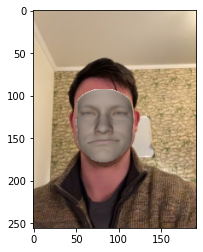

In [26]:
r = pyrender.OffscreenRenderer(pipeline.img_width,pipeline.img_height)
color, depth = r.render(scene)
r.delete()
img_with_mask = np.array(pipeline.img)
img_with_mask[depth != 0] = color[depth != 0]
plt.imshow(img_with_mask)
pltmanager=PlotManager("generated_mask")
pltmanager.save_current_plot("1.png")
plt.show()

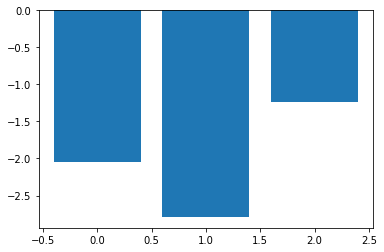

In [11]:
plot_params(params_dense.shape_coefficients)

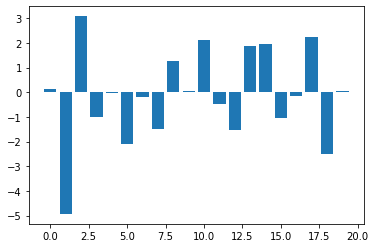

In [12]:
plot_params(params_dense.expression_coefficients)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


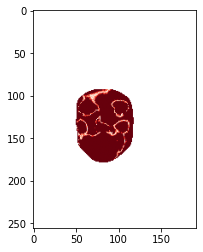

In [25]:
error_image=plot_reconstruction_error(pipeline.depth_img, depth)
plt.imshow(error_image)
pltmanager=PlotManager("error2")
pltmanager.save_current_plot("1.png")
plt.show()

<Figure size 432x288 with 0 Axes>